# Lab | Regression Analysis

### Import libraries here:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Challenge 1
- I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. 
- In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

## Creating dataframe
Use this command to create the dataframe.
```python
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
```

In [2]:
# Your code here

student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

## Plot your data
- Use  `sns.scatterplot` to plot `Age` vs `Tardies` 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


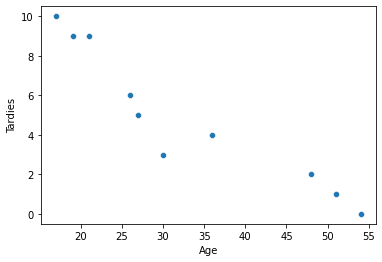

In [3]:
sns.scatterplot(student_data.Age, student_data.Tardies);

- You can also use `sns.pairplot()`.
- This plot the pairwise relationships in a dataset.

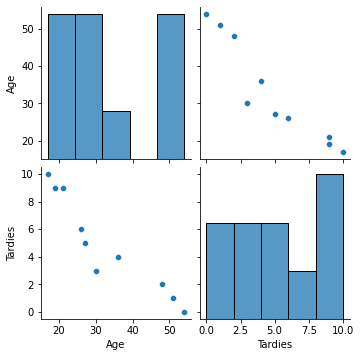

In [16]:
sns.pairplot(student_data[['Age', 'Tardies']]);
plt.show()

- Do you see a trend?
- Can you make any hypotheses about the relationship between age and number of tardies?

> Trend: tardies reduces with age

> Negative relationship between 'Age' and 'Tardies'

## Covariance and correlation

- Calculate the covariance and correlation of the variables. 
- Use `.cov()` and  `.corr()`.
- What is the difference between these two measures?

In [ ]:
# covariance indicates the level to which two variables vary together

In [19]:
student_data[['Age', 'Tardies']].cov()

Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444

In [20]:
# correlation returns the direction and the strengh between two variable

In [21]:
student_data[['Age', 'Tardies']].corr()

Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000

> Both measure only the linear relationships between two variables

> covariance: two variables change the same way

> correlation: strength of a relationship between two variables

> correlation is preferred over covariance because it does not get affected by the change in scale

## Linear regression

- Build a linear regression model for this data. 
- You can use scikit-learn library.
```python
from sklearn.linear_model import LinearRegression
```

### Select variables
- Select your `X` and `y` variables.
- `X` will be your independent variable. **"Age"**
- `y` will be your dependent variable. **"Tardies"**

In [8]:
model = LinearRegression()

In [9]:
# feature – must be in a df format
X = student_data[['Age']]

# target – must be in a Series format
y = student_data['Tardies']

In [11]:
X.head()

Age
0   17
1   51
2   27
3   21
4   36

In [12]:
y.head()

0    10
1     1
2     5
3     9
4     4
Name: Tardies, dtype: int64

### Train and test
- Split the data into train and test:
- `X_train`, `X_test`, `y_train`, `y_test`

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=43)

### Modeling
- Instantiate the LinearRegression class

In [28]:
model = LinearRegression()

### Fit the model 
- Fit the model, the algorithm will learn about the data pattern

In [29]:
model.fit(X_train, y_train)

LinearRegression()

### Prediction
- Predict the y_test that we splitted.
- Save in a variable called `y_pred_test`

In [36]:
y_pred_test = model.predict(X_test)
y_pred_test

array([7.70032573, 5.61889251, 8.16286645])

### Evaluate (test)
- Use the metrics below to evaluate your model and predict data.
- Use the y_test and y_pred_test
```python
from sklearn.metrics import mean_squared_error, r2_score
```

In [38]:
mean_squared_error(y_test, y_pred_test)

3.0828479170424448

In [37]:
print('R2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test, squared=False))

R2: 0.6146440103696944
MAE: 1.5852334419109662
MSE: 1.7558040656754514


### Coefficient and intercept
- Use `model.coef_` and `model.intercept_` to return both values.
- Can you interpret the values?

In [39]:
model.coef_

array([-0.23127036])

In [40]:
model.intercept_

12.557003257328992

- This is the linear regression equation:
__y= mX + b__
> * y: target variable
> * X: feature variables
- coefficient of -0.24: it means that for every unit of change in X (age), the change in y (tardie) is about 24% in a negative direction. 
- In other words: for every year of increasing in age, it will represent a decrease of 24% in tardies.

### Visualize the results
- Use the model that you created to predict the tardies. You will use `X`
- Include predictable tardies into the dataframe.

In [41]:
y_pred = model.predict(X)
student_data['pred_tardies'] = y_pred
student_data

StudentID  Age  Tardies  pred_tardies
0          1   17       10      8.625407
1          2   51        1      0.762215
2          3   27        5      6.312704
3          4   21        9      7.700326
4          5   36        4      4.231270
5          6   48        2      1.456026
6          7   19        9      8.162866
7          8   26        6      6.543974
8          9   54        0      0.068404
9         10   30        3      5.618893

### Plot
- You can use the code below:
- Add the ticks and labels.
```python
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
```

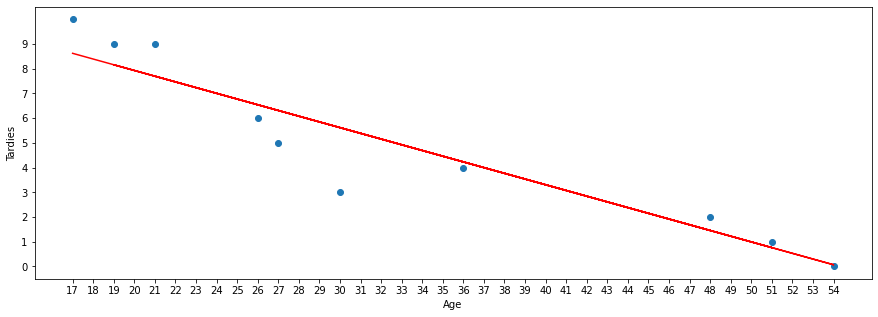

In [42]:
plt.figure(figsize=(15,5))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Tardies')
# set the ticks
plt.yticks(np.arange(0, 10, step=1))
plt.xticks(np.arange(17, 55, step=1))
plt.show()

_______________________________________

# Challenge 2

- In this challenge you will use `vehicles.csv` dataset.
- This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions.
- The goal of this exercise is to predict `vehicles CO2 emissions` based on several independent variables. 

### Read csv file

In [51]:
vehicles_original = pd.read_csv('./data/vehicles.csv', sep=',')

In [52]:
vehicles_original.head(2)

Make              Model  Year  Engine Displacement  Cylinders  \
0  AM General  DJ Po Vehicle 2WD  1984                  2.5        4.0   
1  AM General   FJ8c Post Office  1984                  4.2        6.0   

      Transmission     Drivetrain                Vehicle Class Fuel Type  \
0  Automatic 3-spd  2-Wheel Drive  Special Purpose Vehicle 2WD   Regular   
1  Automatic 3-spd  2-Wheel Drive  Special Purpose Vehicle 2WD   Regular   

   Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0          19.388824        18           17            17   
1          25.354615        13           13            13   

   CO2 Emission Grams/Mile  Fuel Cost/Year  
0               522.764706            1950  
1               683.615385            2550

### Correlations
- Use the variables `Year`, `Cylinders`, `Fuel Barrels/Year`, `Combined MPG`, and `Fuel Cost/Year`.
- Plot the pairwise relationships between columns. You can use `sns.pairplot()`
- Calculate the correlations between each of these variables and the outcome. You can use `.corr()`.
- Analyze which variable is the most important in determining `CO2 Emission Grams/Mile`

In [53]:
vehicles = vehicles_original[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

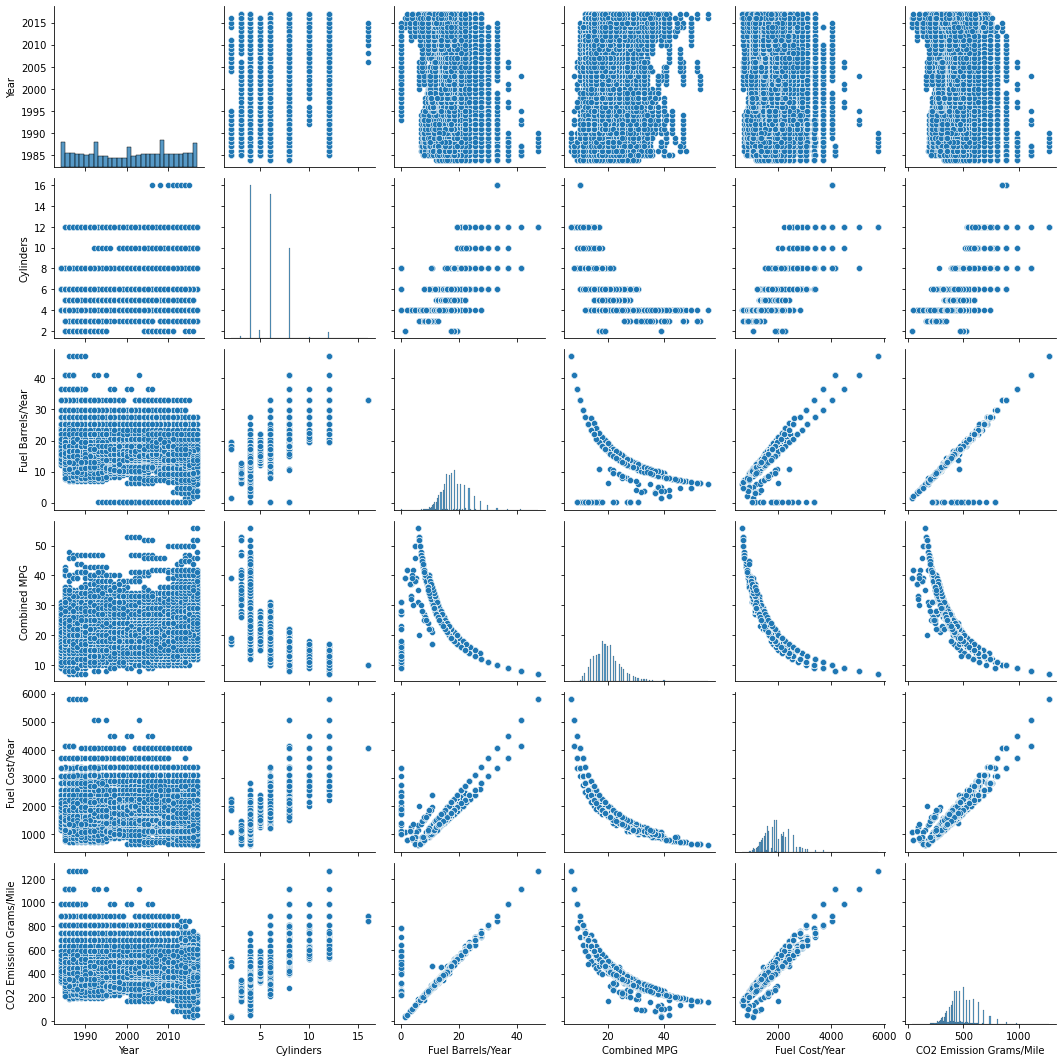

In [54]:
sns.pairplot(vehicles);
plt.show()

In [57]:
vehicles.corr().style.background_gradient(cmap="Greens")

In [56]:
correlations = vehicles.corr()['CO2 Emission Grams/Mile']
correlations

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

### Linear regression
- Build a linear regression to predict the `CO2 Emission Grams/Mile`

In [58]:
# First we split the features from the target
X = vehicles.drop(columns=['CO2 Emission Grams/Mile'])
y = vehicles['CO2 Emission Grams/Mile']

# Then we split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

# Trainning the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predicting (X_test)

In [60]:
# Getting predictions
predictions = model.predict(X_test)

### Evaluate
- Use `mean_squared_error()` and `r2_score()`.
- Use variables `y_test` and `y_pred`

In [61]:
# Checking our metrics
print('R2:', r2_score(y_test, predictions))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions, squared=False))

R2: 0.9862766721034467
MAE: 7.883444378068816
MSE: 13.982794981436115


In [62]:
mean_squared_error(y_test, predictions)

195.518555492875